데이터 분석 절차
- 시각화 -> EDA (탐색적 데이터 분석) -> 특성공학( 변수 추가/선택.... ) -> 모델링 -> 평가 

In [363]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set() # seaborn 디폴트 색상,스타일 등등,,,, 설정

In [364]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [365]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [366]:
train.shape

(891, 12)

In [367]:
train.describe() # 기술 통계

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [368]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [369]:
train.describe(include=['O']) # object의 기술통계를 내라

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sawyer, Mr. Frederick Charles",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [370]:
train.isnull().sum() # 결측값

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [371]:
test.shape
# 891 + 418 = 1309건 데이터
# 2/3 (훈련) + 1/3 (테스트) 
#     70%    +    30%
 

(418, 11)

In [372]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 27.8+ KB


In [373]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [374]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# features와 생존여부 사이에 어떤 관계가 있는지?


In [375]:
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]


In [376]:
# 퀴즈 1
Total_survied= survived['Survived'].size + not_survived['Survived'].size
print("Survived: {0} ({1} %)".format(survived['Survived'].size,survived['Survived'].size/Total_survied *100 ))
print('Survived: {0} ({1} %)'.format(not_survived['Survived'].size,not_survived['Survived'].size/Total_survied *100 ))
print('Total:',Total_survied)

Survived: 342 (38.38383838383838 %)
Survived: 549 (61.61616161616161 %)
Total: 891


In [377]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [378]:
# 등실별 생존여부에 따른 인원수 출력
for i in range(1,4):
    for j in range(2):
        print('class:',i,'생존:',j,train[(train['Pclass'] == i) & (train['Survived']==j)].size)

class: 1 생존: 0 960
class: 1 생존: 1 1632
class: 2 생존: 0 1164
class: 2 생존: 1 1044
class: 3 생존: 0 4464
class: 3 생존: 1 1428


In [379]:
train.groupby(['Pclass','Survived']).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [380]:
train[['Pclass','Survived']].groupby(['Pclass'],as_index = False).mean() # as_index = False 인덱스로 사용하지 않겠다. 

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


<AxesSubplot:xlabel='Pclass'>

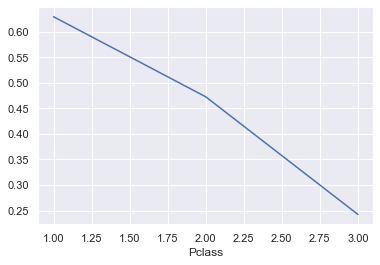

In [381]:
train.groupby('Pclass').Survived.mean().plot()

<AxesSubplot:xlabel='Pclass'>

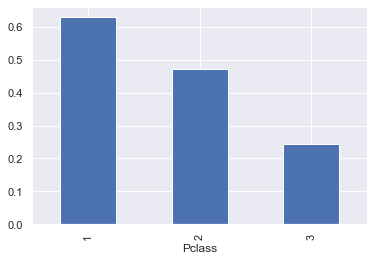

In [382]:
train.groupby('Pclass').Survived.mean().plot(kind = 'bar')

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

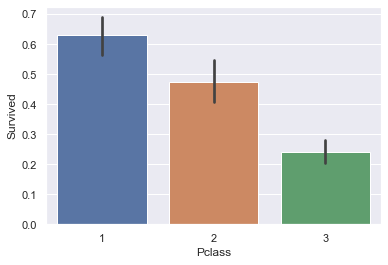

In [383]:
sns.barplot(x = 'Pclass',y = 'Survived',data = train)

In [384]:
train[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [385]:
# Pclass 와  Sex 동시 고려 생존률과의 관계
# 크로스 테이블(교차행렬)
pd.crosstab(train['Pclass'],train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


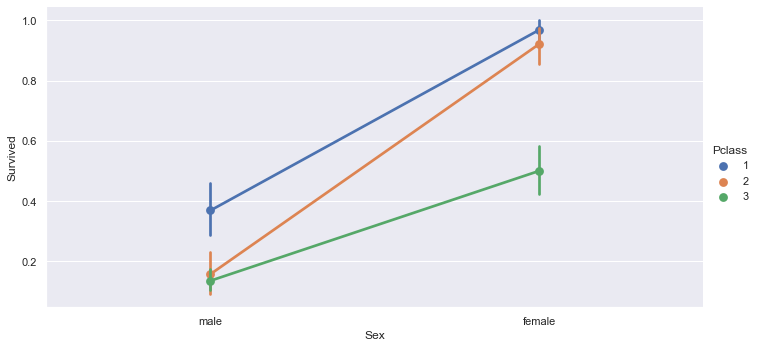

In [386]:
sns.factorplot('Sex','Survived',hue = 'Pclass',data= train,aspect =2)

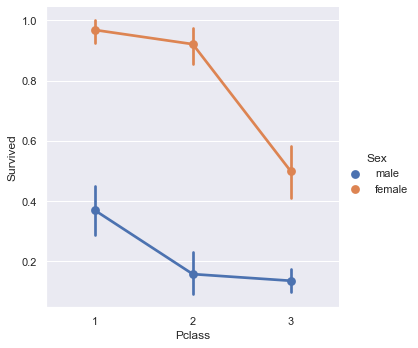

In [387]:
sns.factorplot('Pclass','Survived',hue = 'Sex',data= train)

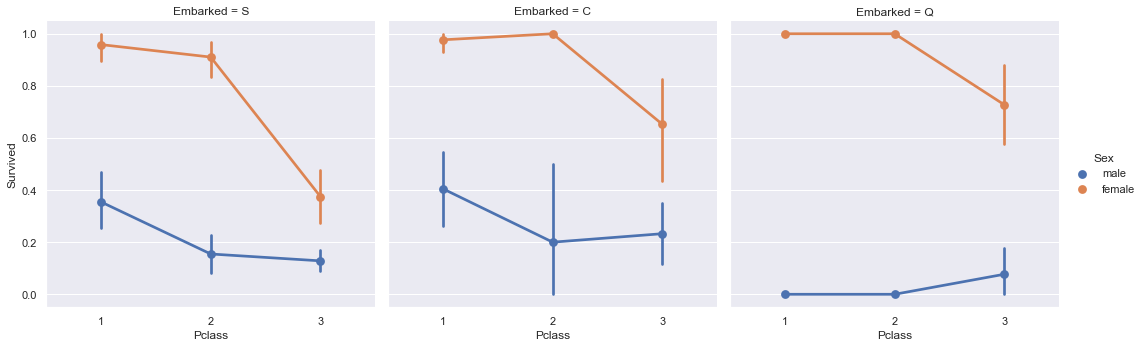

In [388]:
sns.factorplot('Pclass','Survived',hue = 'Sex',col = 'Embarked',data= train)

In [389]:
# 승선항구에 따른 생존 여부
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [390]:
train.groupby('Embarked').Survived.value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

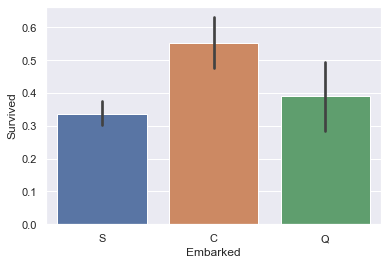

In [391]:
sns.barplot('Embarked','Survived',data = train)

In [392]:
# parch 와의 생존 여부
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [393]:
train.groupby('Parch').Survived.value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

In [394]:
train[['Parch','Survived']].groupby('Parch',as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

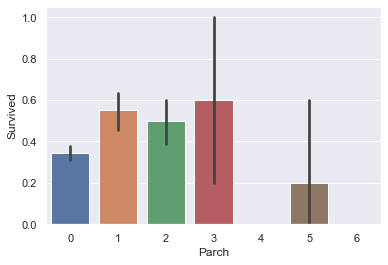

In [395]:
sns.barplot('Parch','Survived',data= train)
# error bar (오차막대) : 신뢰 구간

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

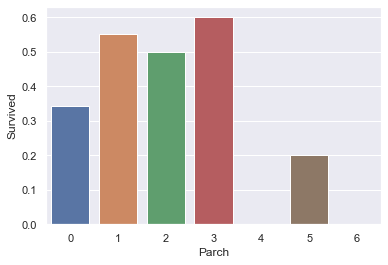

In [396]:
sns.barplot('Parch','Survived',data= train,ci =None)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

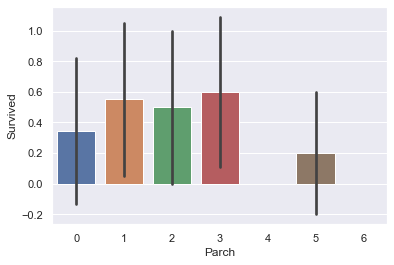

In [397]:
sns.barplot('Parch','Survived',data= train,ci ='sd') # 표준편차

In [398]:
# SibSp 와의 관계 여부
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [399]:
train.groupby('SibSp').Survived.value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

In [400]:
train[['SibSp','Survived']].groupby('SibSp',as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

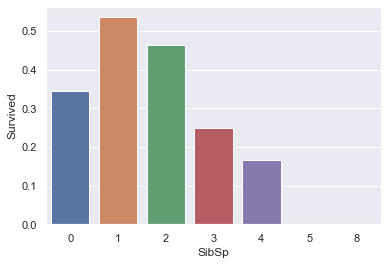

In [401]:
sns.barplot('SibSp','Survived',data= train,ci =None)

<AxesSubplot:xlabel='Sex', ylabel='Age'>

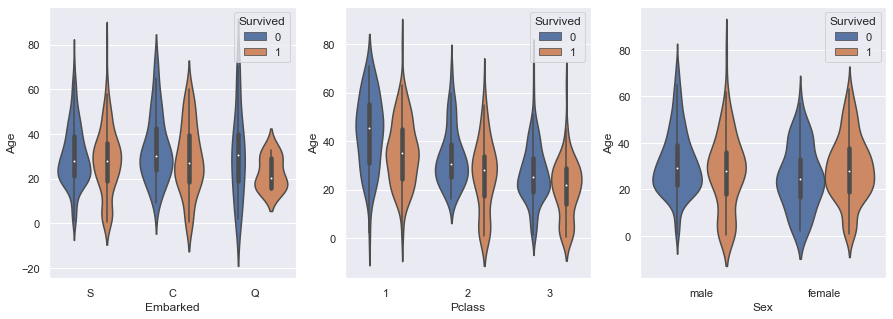

In [402]:
# 연령별(y)) 항구/pclass/성별(x) 생존여부(범례) -> 바이롤린 plot

# 외형(틀) matplot 
# 내부에 들어가는 그래프는 seaborn
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131) # 1줄 3칸으로 나눈다음 1번째 위치
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)

# 연령별(y)) 항구/pclass/성별(x) 생존여부(범례) -> 바이롤린 plot
sns.violinplot('Embarked','Age',hue= 'Survived',data=train,ax = ax1)
sns.violinplot('Pclass','Age',hue= 'Survived',data=train,ax = ax2)
sns.violinplot('Sex','Age',hue= 'Survived',data=train,ax = ax3)

# 흰색점 : 중앙값(median)
# 중앙의 두꺼운 선 : 사분위 범위
# 중앙의 얇은 선 : 신뢰구간 (95% 신뢰구간)

In [403]:
total_survived = train[train['Survived'] ==1]
total_not_survived = train[train['Survived'] ==0]
male_survived = train[(train['Survived'] ==1) &(train['Sex'] == 'male')]
male_not_survived = train[(train['Survived'] ==0) &(train['Sex'] == 'male')]
female_survived = train[(train['Survived'] ==1) &(train['Sex'] == 'female')]
female_not_survived = train[(train['Survived'] ==0) &(train['Sex'] == 'female')]

In [404]:
total_survived['Age'].dropna().values

array([38.  , 26.  , 35.  , 27.  , 14.  ,  4.  , 58.  , 55.  , 34.  ,
       15.  , 28.  , 38.  , 14.  ,  3.  , 19.  , 49.  , 29.  , 21.  ,
        5.  , 38.  , 29.  , 17.  , 32.  ,  0.83, 30.  , 29.  , 17.  ,
       33.  , 23.  , 23.  , 34.  , 21.  , 32.5 , 12.  , 24.  , 29.  ,
       19.  , 22.  , 24.  , 27.  , 22.  , 16.  , 40.  ,  9.  ,  1.  ,
        1.  ,  4.  , 45.  , 32.  , 19.  ,  3.  , 44.  , 58.  , 18.  ,
       26.  , 16.  , 40.  , 35.  , 31.  , 27.  , 32.  , 16.  , 38.  ,
       19.  , 35.  ,  5.  ,  8.  , 24.  , 37.  , 29.  , 30.  , 35.  ,
       50.  ,  3.  , 25.  , 58.  , 35.  , 25.  , 41.  , 63.  , 35.  ,
       19.  , 30.  , 42.  , 22.  , 26.  , 19.  , 50.  ,  0.92, 17.  ,
       30.  , 24.  , 18.  , 26.  , 24.  , 31.  , 40.  , 30.  , 22.  ,
       36.  , 36.  , 31.  , 16.  , 41.  , 45.  ,  2.  , 24.  , 24.  ,
       40.  ,  3.  , 22.  , 60.  , 24.  , 25.  , 22.  , 42.  ,  1.  ,
       35.  , 36.  , 17.  , 36.  , 21.  , 23.  , 24.  , 28.  , 39.  ,
        3.  , 33.  ,

<AxesSubplot:xlabel='age'>

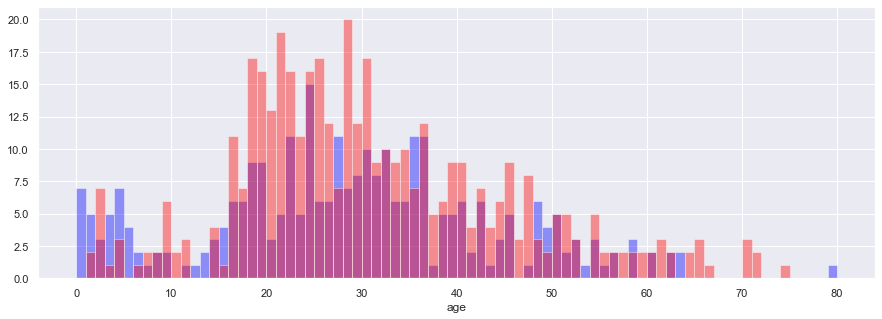

In [405]:
# distplot : 히스토그램, 수치형 데이터의 빈도수를 시각화 (나이에 따른 빈도수)
plt.figure(figsize= (15,5))
plt.subplot(111)
sns.distplot(total_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='blue') # kde : (True) 밀집도 그래프(선 그래프)
sns.distplot(total_not_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='red',axlabel='age')

<AxesSubplot:xlabel='male Age'>

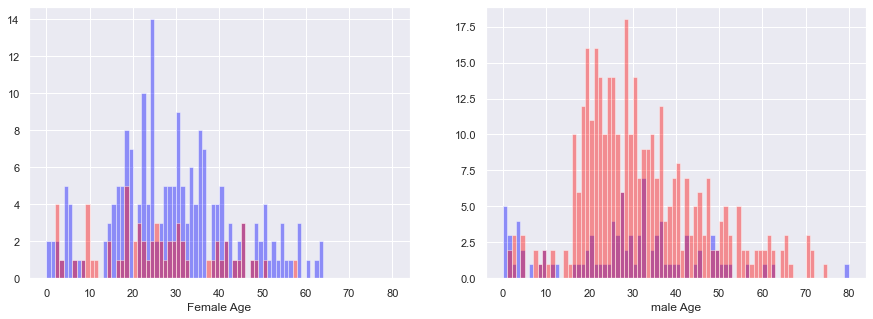

In [406]:
# distplot : 히스토그램, 수치형 데이터의 빈도수를 시각화 (나이에 따른 빈도수)
plt.figure(figsize= (15,5))
plt.subplot(121) #1줄 2칸 1번칸 출력
sns.distplot(female_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='blue',axlabel='Female Age')
sns.distplot(female_not_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='red',axlabel='Female Age')

plt.subplot(122) #1줄 2칸 1번칸 출력
sns.distplot(male_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='blue',axlabel='male Age')
sns.distplot(male_not_survived['Age'].dropna().values,kde=False,bins = range(0,81,1),color='red',axlabel='male Age')


# 상관계수 heatmap

In [407]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [408]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [409]:
train.drop(columns='PassengerId').corr()


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

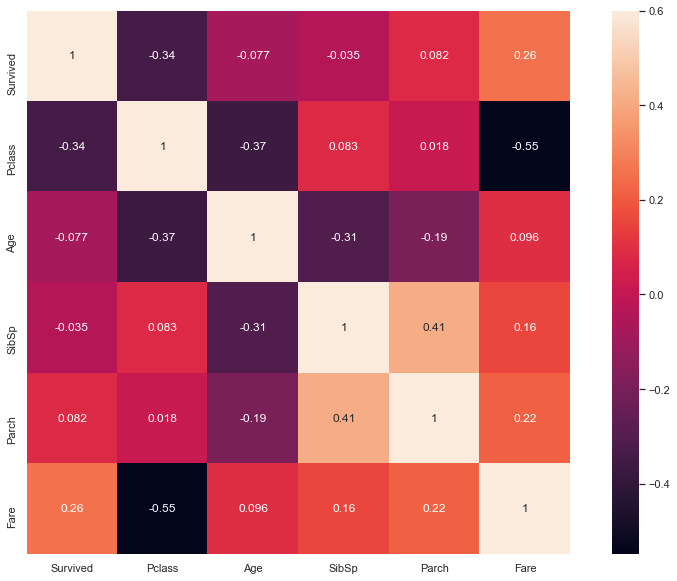

In [410]:
# 양/음의 상관관계
plt.figure(figsize=(15,10))
sns.heatmap(train.drop(columns='PassengerId').corr(),square = True,annot = True,vmax = 0.6) # 상관계수 행렬

In [411]:
# figure Engineering & category < - > numerical 
train 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [412]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [413]:
train_test_data=[train,test] # 리스트 내에 데이터 프레임 2개가 요소로 저장 


In [414]:
for dataset in train_test_data:
    dataset['title'] = dataset.Name.str.extract("([A-Za-z]+)\.") # 호칭의 특징 : 공백문자 + 알파벳 + 점.

In [415]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [416]:
train.groupby(['title','Sex']).size().unstack().fillna(0)

Sex,female,male
title,,
Capt,0.0,1.0
Col,0.0,2.0
Countess,1.0,0.0
Don,0.0,1.0
Dr,1.0,6.0
Jonkheer,0.0,1.0
Lady,1.0,0.0
Major,0.0,2.0
Master,0.0,40.0


In [417]:
pd.crosstab(train['title'],train['Sex'])

Sex,female,male
title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [418]:
for dataset in train_test_data:
    dataset['title'] = dataset['title'].replace('Mlle','Miss')
    dataset['title'] = dataset['title'].replace('Ms','Miss')
    dataset['title'] = dataset['title'].replace('Mme','Mrs')
    dataset['title'] = dataset['title'].replace('Lady','Mrs')
    dataset['title'] = dataset['title'].replace(['Countess','Don','Sir','Jonkheer','Capt','Col','Rev','Dr','Major'],'Other')

In [419]:
pd.crosstab(train['title'],train['Sex'])

Sex,female,male
title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,127,0
Other,2,20


In [420]:
train[['title','Survived']].groupby('title',as_index = False).mean() #  0 이면 사망, 1 이면 생존이기 때문에 mean함수를 쓰면 생존률이 나온다. 

,title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.795276
4,Other,0.318182


In [421]:
title_mapping ={'Mr':1,
'Miss':2,
'Mrs':3,
'Master':4,
'Other':5}
for dataset in train_test_data:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)

In [422]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [423]:
train['title'].value_counts()

1    517
2    185
3    127
4     40
5     22
Name: title, dtype: int64

In [424]:
# female ->1 male -> 0 
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map({'female':1,'male':0})
    dataset['Sex'] = dataset['Sex'].fillna(0)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,1


In [425]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  title        891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 76.6+ KB


In [426]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [427]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [428]:
# nan은 전부 'S'로 설정
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [429]:
# S : 0 C: 1 Q : 2 로 변경 
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0,'C':1,'Q':2})
    

In [430]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,1


In [431]:
# Age 열의 결측값을 대체 ( 더 좋은 방법 고민...)
train['Age'].isnull().sum()

# age 평균 - age 표준편차 <= 난수발생 (결측값 대체) <= age평균 + age 표준편차 

177

In [432]:
train['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [433]:
test['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [434]:
train['Age'][np.isnan(train['Age'])]

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [435]:
for dataset in train_test_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum() # 결측값 갯수 만큼 난수 생성
    age_null_random_list = np.random.randint(age_avg-age_std,age_avg+age_std,size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    

In [436]:
train['Age'].isnull().sum()

0

In [437]:
test['Age'].isnull().sum()

0

In [438]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  title        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 80.1+ KB


In [439]:
train['AgeBand'] = pd.cut(train['Age'],5)

In [440]:
train[['AgeBand','Survived']].groupby('AgeBand',as_index= False).mean()

,AgeBand,Survived
0,"(0.34, 16.336]",0.522124
1,"(16.336, 32.252]",0.356347
2,"(32.252, 48.168]",0.369478
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [441]:
# 연령대로 나이 변환
for dataset in train_test_data:
    dataset.loc[dataset['Age'] <=16,'Age'] = 0
    dataset.loc[(dataset['Age'] >16) & (dataset['Age'] <=32),'Age'] = 1
    dataset.loc[(dataset['Age'] >32) & (dataset['Age'] <=48),'Age'] = 2
    dataset.loc[(dataset['Age'] >48) & (dataset['Age'] <=64),'Age'] = 3
    dataset.loc[dataset['Age'] >64,'Age'] = 4


In [442]:
train['Age']

0      1.0
1      2.0
2      1.0
3      2.0
4      2.0
      ... 
886    1.0
887    1.0
888    2.0
889    1.0
890    1.0
Name: Age, Length: 891, dtype: float64

In [443]:
for dataset in train_test_data:
   dataset['Fare'] = dataset['Fare'].fillna(train['Fare'].median()) # train과 test의 'Fare' 컬럼값이 nan인 셀 값을 train의 'Fare' 컬럼값의 중앙값으로 설정 

In [444]:

train['Fareband'] = pd.qcut(train['Fare'],4)  # pd.cut : 동일 길이로 나누어서 범주로 만듬 pd.qcut()은 동일한 갯수로 나눈다.
train[['Fareband','Survived']].groupby('Fareband',as_index= False).mean()

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [445]:
for dataset in train_test_data:
    dataset.loc[dataset['Fare'] <=7.91,'Age'] = 0
    dataset.loc[(dataset['Fare'] >7.91) & (dataset['Fare'] <=14.454),'Fare'] = 1
    dataset.loc[(dataset['Fare'] >14.454) & (dataset['Fare'] <=31.0),'Fare'] = 2
    dataset.loc[(dataset['Fare'] >31.0) ,'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype('int')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    int32   
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    int64   
 12  title        891 non-null    int64   
 13  AgeBand      891 non-null    category
 14  Fareband     891 non-null    category
dtypes: category(2), float64(1), int32(1), int64(8), object(3)
memory usage: 78.8+ KB


In [446]:
for dataset in train_test_data:
    dataset['Familysize'] = dataset['SibSp']+dataset['Parch']+1
train[['Familysize','Survived']].groupby('Familysize',as_index= False).mean()

,Familysize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [447]:
# 혼자 여행한 경우에 사망률이 높음을 알 수 있다. 
for dataset in train_test_data:
    dataset['IsAlone'] =0 # 혼자가 아님 (디폴트)
    dataset.loc[dataset['Familysize'] == 1,'IsAlone']=1
train[['IsAlone','Survived']].groupby('IsAlone',as_index = False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [448]:
features_drop =['Name','SibSp','Parch','Cabin', 'Ticket','Familysize']
train = train.drop(features_drop,axis =1 )
test = test.drop(features_drop,axis =1 )
train = train.drop(['PassengerId','AgeBand','Fareband'],axis =1 )

In [449]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'title',
       'IsAlone'],
      dtype='object')

In [450]:
train['Fare']

0      7
1      3
2      1
3      3
4      1
      ..
886    1
887    2
888    2
889    2
890    7
Name: Fare, Length: 891, dtype: int32

In [451]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,0,3,0,0.0,7,0,1,0
1,1,1,1,2.0,3,1,3,0
2,1,3,1,1.0,1,0,2,1
3,1,1,1,2.0,3,0,3,0
4,0,3,0,2.0,1,0,1,1


In [452]:
xTrain = train.drop('Survived',axis = 1)
yTrain = train['Survived']
xTest = test.drop('PassengerId',axis = 1).copy()
xTrain.shape,yTrain.shape,xTest.shape

((891, 7), (891,), (418, 7))

In [453]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,title,IsAlone
0,892,3,0,0.0,7,2,1.0,1
1,893,3,1,0.0,7,0,3.0,0
2,894,2,0,3.0,1,2,1.0,1
3,895,3,0,1.0,1,0,1.0,1
4,896,3,1,1.0,1,0,3.0,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,1.0,1,0,1.0,1
414,1306,1,1,2.0,3,1,0.0,1
415,1307,3,0,0.0,7,0,1.0,1
416,1308,3,0,2.0,1,0,1.0,1


In [454]:
from sklearn.tree import DecisionTreeClassifier

In [455]:
model = DecisionTreeClassifier()
model.fit(xTrain,yTrain)
y_pred_df = model.predict(xTest)


mysubmit = pd.DataFrame({
    'PassengerId' :test['PassengerId'],
    'Survived' : y_pred_df
})

In [456]:
mysubmit.to_csv("mysubmit.csv",index =False)

In [457]:
round(model.score(xTrain,yTrain)*100,2)

86.87